# **DataPreparation and Modelling**

## Objectives

Answer business requirement 2:  
The client wants to understand whether the potato in the image is healthy or infected with specific pathogens.

## Inputs

         .
         ├── inputs   
         │   └──resized_dataset
         │      └──potatoe  
         │           ├── test  
         │           │   ├── healthy  
         │           │   ├── Black_Scurf  
         │           │   ├── Blackleg  
         │           │   ├── Common_Scab  
         │           │   ├── Dry_Rot  
         │           │   └── Pink_Rot
         │           ├── train
         │           │   ├── healthy  
         │           │   ├── Black_Scurf  
         │           │   ├── Blackleg  
         │           │   ├── Common_Scab  
         │           │   ├── Dry_Rot  
         │           │   └── Pink_Rot
         │           └── validation
         │               ├── healthy  
         │               ├── Black_Scurf  
         │               ├── Blackleg  
         │               ├── Common_Scab  
         │               ├── Dry_Rot  
         │               ├── Pink_Rot 
         │               └── Miscellaneous  
         └── ...


## Outputs

*????????

---

# Change working directory

We store our Jupyter notebooks in a subfolder of the project. Therefore, when we run the notebooks in the editor, we need to change the working directory. This is necessary to ensure proper access to data files and other project resources that might be located outside the notebook's subfolder.

We need to change the working directory from its current folder to its parent folder

To access the current working directory, we use the os.getcwd() command.

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Potato-Diseases-Detector/jupyter_notebooks'

Then, we change the working directory from its current folder to its parent folder to facilitate the correct file path references within our notebooks.

os.path.dirname() gets the parent directory
os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Potato-Diseases-Detector'

# Working and output directories, Label names, Image Shape

In [5]:
# Set input directories
train_path = 'inputs/resized_datasets/train'
val_path = 'inputs/resized_datasets/validation'
test_path = 'inputs/resized_datasets/test'

# Set output directory
file_path = 'outputs/v1'

# Retrieve class/label names
labels = os.listdir(train_path)
print('Labels for the images are:', labels)

# Load saved average image dimensions
import joblib
image_shape = joblib.load(filename=f"{file_path}/image_shape.pkl")
print('Image shape is:', image_shape)

Labels for the images are: ['Black Scurf', 'Blackleg', 'Common Scab', 'Dry Rot', 'Healthy Potatoes', 'Pink Rot']
Image shape is: (224, 224, 3)


---

# Image data augmentation

### Augmentation parameters

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Augmentation parameters
augmentation_params = {
    "featurewise_center": False,
    "samplewise_center": False,
    "featurewise_std_normalization": False,
    "samplewise_std_normalization": False,
    "zca_whitening": False,
    "rotation_range": 20,
    "width_shift_range": 0.1,
    "height_shift_range": 0.1,
    "shear_range": 0.1,
    "zoom_range": 0.2,
    "channel_shift_range": 0.1,
    "fill_mode": 'nearest',
    "cval": 0,
    "horizontal_flip": True,
    "vertical_flip": True,
    "brightness_range": [0.8, 1.2],
    "rescale": 1./255
}

augmented_image_data = ImageDataGenerator(**augmentation_params)


### Augment training image set

In [57]:
# Initialize ImageDataGenerator for training data
augmented_image_data = ImageDataGenerator(**augmentation_params)

# Set batch size to ensure equal distribution
batch_size = 22

# Path to training data
train_path = "inputs/resized_datasets/train"

# Create generator for training data
train_set = augmented_image_data.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Using the average image size
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 262 images belonging to 6 classes.


In [8]:
class_indices = train_set.class_indices
print(class_indices)


{'Black Scurf': 0, 'Blackleg': 1, 'Common Scab': 2, 'Dry Rot': 3, 'Healthy Potatoes': 4, 'Pink Rot': 5}


### Plot augmented training image set

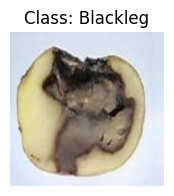

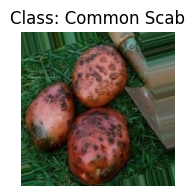

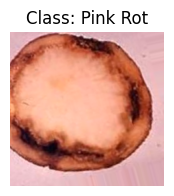

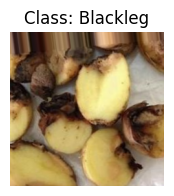

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieving class_indices from the data generator
class_indices = train_set.class_indices
# Inverting the dictionary to get class labels
indices_class = {v: k for k, v in class_indices.items()}

# Visualizing the first 4 images from the training set
for _ in range(4):
    # Getting a batch of images and labels
    imgs, labels = train_set.next()

    # Visualizing the first image in the batch
    plt.figure(figsize=(2, 2))
    plt.imshow(imgs[0])
    plt.axis('off')

    # Getting the label as an index
    label_index = np.argmax(labels[0])
    # Getting the class name by index
    label_name = indices_class[label_index]
    
    plt.title(f"Class: {label_name}")
    plt.show()

### Augment validation image set

In [59]:
# Initialize ImageDataGenerator for validation data
augmented_image_data = ImageDataGenerator(**augmentation_params)

# Set batch size for validation set
batch_size = 11

# Path to validation data
validation_path = "inputs/resized_datasets/validation"

# Create generator for validation data
validation_set = augmented_image_data.flow_from_directory(
    validation_path,
    target_size=(224, 224),  # Using the average image size
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 55 images belonging to 6 classes.


### Plot augmented validation image set

(11, 224, 224, 3)


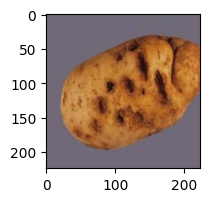

(11, 224, 224, 3)


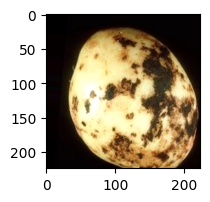

(11, 224, 224, 3)


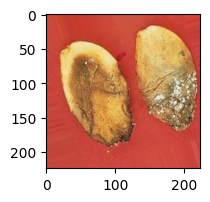

In [60]:
for _ in range(3):
    plt.figure(figsize=(2, 2))
    img, label = validation_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

### Augment test image set

In [61]:
# Initialize ImageDataGenerator for test data
augmented_image_data = ImageDataGenerator(**augmentation_params)

# Set batch size for test set
batch_size = 15 

# Path to test data 
test_path = "inputs/resized_datasets/test"

# Create generator for test data
test_set = augmented_image_data.flow_from_directory(
    test_path,
    target_size=(224, 224),  # Using the average image size
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 60 images belonging to 6 classes.


### Plot augmented test image set

(15, 224, 224, 3)


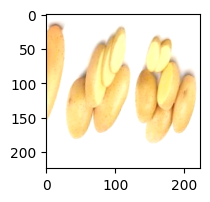

(15, 224, 224, 3)


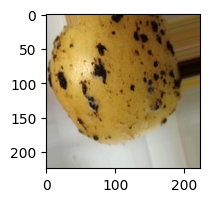

(15, 224, 224, 3)


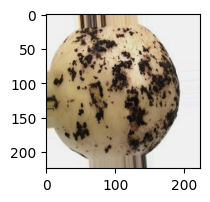

In [62]:
for _ in range(3):
    plt.figure(figsize=(2, 2))
    img, label = test_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

### Save class_indices

In [63]:
# Path to directory for saving files
file_path = 'outputs/v1'

# Save class indices from the training set
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

# Print message confirming successful saving
print(f"Class indices saved to {file_path}/class_indices.pkl")

Class indices saved to outputs/v1/class_indices.pkl


---

# Model Creation

In [19]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import l2

def create_transfer_learning_model(image_shape):
    # Создание расписания распада скорости обучения
    lr_schedule = ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=10000,
        decay_rate=0.9)

    # Использование расписания в оптимизаторе
    optimizer = RMSprop(learning_rate=lr_schedule, momentum=0.8)

    base_model = MobileNetV2(input_shape=image_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())

    # Добавляем Dense слой с L2 регуляризацией
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))

    # Добавляем слой Dropout
    model.add(Dropout(0.5))

    # Выходной слой
    model.add(Dense(6, activation='softmax'))  # 6 классов

    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model


### Model Summary

In [20]:
from tensorflow.keras.layers import Dense

model = create_transfer_learning_model(image_shape)
model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                           

### Callbacks

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callback for early stopping to stop training if validation accuracy does not improve
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=4)

# Callback for saving the model that shows the best performance on validation data
m_checkpoint = ModelCheckpoint(filepath='outputs/v1/potato_diseases.keras', monitor='val_accuracy', mode='max', save_best_only=True)

### Fit model for training

In [35]:
num_epochs = 20
total_samples = 262
batch_size = 25
steps_per_epoch = total_samples // batch_size
model.fit(train_set,
          batch_size=batch_size,
          epochs=num_epochs,
          steps_per_epoch=steps_per_epoch,
          validation_data=validation_set,
          callbacks=[early_stop, m_checkpoint],
          verbose=1)

Epoch 1/20
 2/10 [=====>........................] - ETA: 6s - loss: 0.8493 - accuracy: 0.7955

10/10 [==============================] - 11s 1s/step - loss: 0.6232 - accuracy: 0.8073 - val_loss: 0.8347 - val_accuracy: 0.8182
Epoch 2/20
10/10 [==============================] - 8s 766ms/step - loss: 0.6213 - accuracy: 0.8045 - val_loss: 1.0834 - val_accuracy: 0.8182
Epoch 3/20
10/10 [==============================] - 5s 554ms/step - loss: 0.6423 - accuracy: 0.8119 - val_loss: 0.8106 - val_accuracy: 0.8000
Epoch 4/20
10/10 [==============================] - 5s 523ms/step - loss: 0.5337 - accuracy: 0.8394 - val_loss: 0.9573 - val_accuracy: 0.7818
Epoch 5/20
10/10 [==============================] - 5s 514ms/step - loss: 0.5969 - accuracy: 0.8440 - val_loss: 0.9076 - val_accuracy: 0.8000
Epoch 5: early stopping


### Fine-tuning

In [73]:
from tensorflow.keras.models import load_model


# Загрузка модели, сохраненной с помощью ModelCheckpoint
model = load_model('outputs/v1/potato_diseases.keras')

# Удаление последнего слоя (выходного слоя классификации)
model.pop()

# Добавление новых слоев или изменение параметров существующих
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # Изменение коэффициента регуляризации
model.add(Dropout(0.2))  # Изменение степени Dropout

# Добавление выходного слоя снова (6 классов)
model.add(Dense(6, activation='softmax'))  # Выходной слой с 6 классами


# Размораживаем верхние слои базовой модели
fine_tune_at = 1
base_model = model.layers[0]  # предполагается, что base_model - это первый слой в Sequential
for layer in base_model.layers[-fine_tune_at:]:
    layer.trainable = True

# Создание расписания распада скорости обучения для fine-tuning
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,  # меньшее значение для fine-tuning
    decay_steps=10000,
    decay_rate=0.9)

# Перекомпиляция модели с новыми настройками
optimizer = RMSprop(learning_rate=lr_schedule, momentum=0.8)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback для ранней остановки, чтобы прекратить обучение, если валидационная точность не улучшается
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=4)

# Callback для сохранения модели, которая показывает лучший результат на валидационных данных
# Сохраняем эту версию отдельно от лучшей версии базовой модели
m_checkpoint = ModelCheckpoint(filepath='outputs/v1/potato_diseases_finetuned.keras', monitor='val_accuracy', mode='max', save_best_only=True)

# Продолжение обучения
# Здесь ты должна указать параметры, такие как train_set, validation_set, количество эпох и т.д.
model.fit(train_set, validation_data=validation_set, epochs=30, callbacks=[early_stop, m_checkpoint], verbose=1)

Epoch 1/30
12/12 [==============================] - 14s 1s/step - loss: 2.7222 - accuracy: 0.2710 - val_loss: 1.6254 - val_accuracy: 0.4909
Epoch 2/30
12/12 [==============================] - 11s 951ms/step - loss: 1.6479 - accuracy: 0.4466 - val_loss: 1.3201 - val_accuracy: 0.7455
Epoch 3/30
12/12 [==============================] - 11s 890ms/step - loss: 1.4824 - accuracy: 0.5267 - val_loss: 1.1291 - val_accuracy: 0.6545
Epoch 4/30
12/12 [==============================] - 11s 942ms/step - loss: 1.3182 - accuracy: 0.5267 - val_loss: 0.9390 - val_accuracy: 0.7636
Epoch 5/30
12/12 [==============================] - 11s 882ms/step - loss: 1.2042 - accuracy: 0.5916 - val_loss: 0.9826 - val_accuracy: 0.7273
Epoch 6/30
12/12 [==============================] - 14s 1s/step - loss: 1.0523 - accuracy: 0.6450 - val_loss: 0.8531 - val_accuracy: 0.7818
Epoch 7/30
12/12 [==============================] - 11s 940ms/step - loss: 1.0316 - accuracy: 0.6489 - val_loss: 0.8027 - val_accuracy: 0.8000
Epoch

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Сначала получим предсказания модели на валидационном наборе данных
predictions = model.predict(validation_set)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Отчёт о Классификации
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Матрица Ошибок
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

5/5 [==============================] - 3s 348ms/step
                  precision    recall  f1-score   support

     Black Scurf       0.00      0.00      0.00         8
        Blackleg       0.14      0.11      0.12         9
     Common Scab       0.21      0.33      0.26         9
         Dry Rot       0.36      0.44      0.40         9
Healthy Potatoes       0.17      0.17      0.17        12
        Pink Rot       0.20      0.12      0.15         8

        accuracy                           0.20        55
       macro avg       0.18      0.20      0.18        55
    weighted avg       0.18      0.20      0.19        55

[[0 1 3 0 2 2]
 [3 1 1 1 3 0]
 [1 0 3 0 4 1]
 [0 1 3 4 1 0]
 [1 3 1 4 2 1]
 [1 1 3 2 0 1]]


In [ ]:
from keras.models import load_model

best_model = load_model('outputs/v1/potato_diseases.keras')